# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


顔検出が面内回転に対してどれくらい頑強かを評価する。

データベースによっては既に目位置を正規化してあり、
面内回転を加えたデータで評価してはじめて、実際環境での顔検出能力を評価できる。

そこで、このスクリプトでは、データに面内回転を加えた画像を作って
検出率を評価している。


In [1]:
%matplotlib inline
import pandas as pd

In [2]:

import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")
scales = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [3]:
# names = names[:50]

In [4]:
import resnet_ssd_face as faceDetector
for scale in scales:
    faceDetector.processDatabase(dataset, names, scale=scale)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


# 検出処理後のデータ解析

In [5]:
dfs={}
deg = 0
import os
for scale in scales:
    dfs[scale] = pd.read_csv("log_%s_%d_%f.csv" % (dataset, deg, scale))
    print scale, dfs[scale]["truePositives"].mean()

1.0 0.98
0.9 1.0
0.8 1.0
0.7 1.0
0.6 1.0
0.5 0.98
0.4 0.96
0.3 0.9
0.2 0.78
0.1 0.0


In [6]:
rates = [dfs[scale]["truePositives"].mean() for scale in scales]
falseRates = [dfs[scale]["falsePositives"].mean() for scale in scales]
data = {"scales":scales, "rates":rates, "falseRates":falseRates}
df = pd.DataFrame(data, columns=["scales", "rates", "falseRates"])

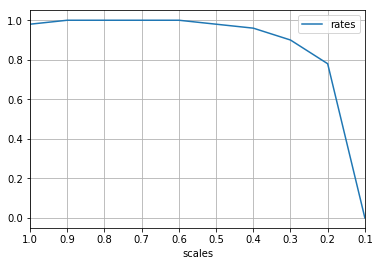

In [7]:
df.plot(x="scales", y="rates", grid=True)

上の図は、画像の面内回転によって、どれだけ検出率が変化するのかを示している。

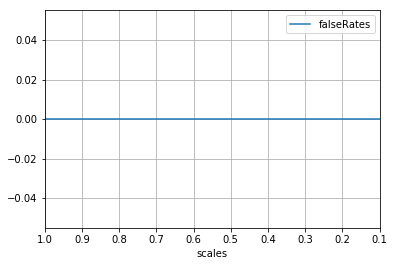

In [8]:
df.plot(x="scales", y="falseRates", grid=True)